/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Forecasted Reservoir Water Levels (BCM):
2023-02-01    0.331221
2023-02-02    0.388315
2023-02-03    0.297875
2023-02-04    0.415027
2023-02-05    0.370710
2023-02-06    0.280714
2023-02-07    0.416528
2023-02-08    0.359263
2023-02-09    0.424047
2023-02-10    0.481733
2023-02-11    0.363515
2023-02-12    0.370221
2023-02-13    0.322004
2023-02-14    0.299018
2023-02-15    0.345382
2023-02-16    0.312321
2023-02-17    0.373992
2023-02-18    0.329006
2023-02-19    0.362452
2023-02-20    0.344964
2023-02-21    0.342602
2023-02-22    0.424451
2023-02-23    0.336996
2023-02-24    0.366123
2023-02-25    0.328525
2023-02-26    0.359192
2023-02-27    0.308925
2023-02-28    0.383763
2023-03-01    0.363240
2023-03-02    0.287894
Freq: D, Name: predicted_mean, dtype: float64

Confidence Intervals:
            lower Reservoir Water Level (BCM)  \
2023-02-01                           0.231536   
2023-02-02                           0.288555   
2023-02-03                           0.197576   
2023

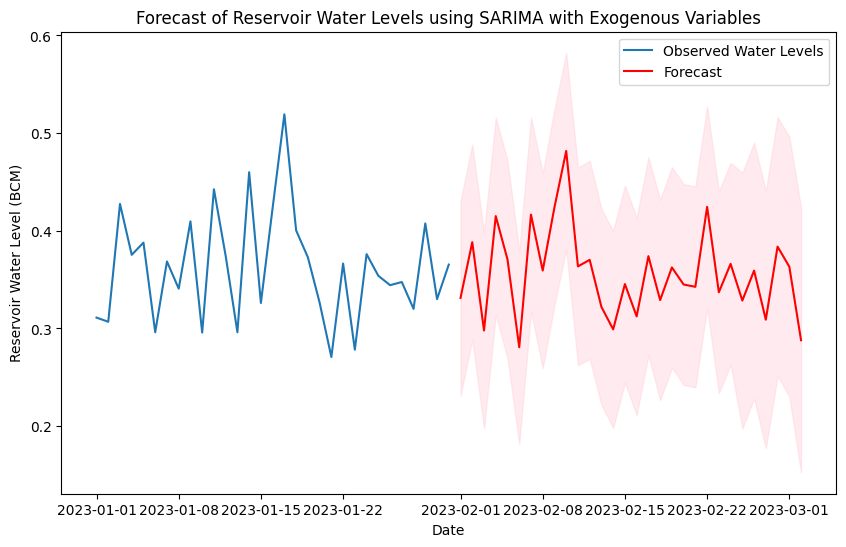

In [ ]:
import pandas as pd
import numpy as np
from statsmodels.tsa.statespace.sarimax import SARIMAX
import matplotlib.pyplot as plt

# Load the data
df = pd.read_csv('/content/karnataka_water_data_january_2023.csv')

# Convert 'Date' to datetime format
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)

# Select only numeric columns for resampling and calculating daily mean
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
daily_data = df[numeric_cols].resample('D').mean()

# Now daily_data should have unique dates as the index, and you can use this for modeling.
# Define SARIMAX model with external regressors for water level and rainfall
model = SARIMAX(daily_data['Reservoir Water Level (BCM)'],
                order=(1, 1, 1),
                seasonal_order=(1, 1, 1, 12),
                exog=daily_data[['Rainfall (mm)', 'Evapotranspiration Rate (mm)']])

results = model.fit()

# Forecasting
n_periods = 30
# Assuming we have future values for exogenous variables, for simplicity here we use the last available values
exog_forecast = daily_data[['Rainfall (mm)', 'Evapotranspiration Rate (mm)']].iloc[-n_periods:]  # example external data for forecast
forecast = results.get_forecast(steps=n_periods, exog=exog_forecast)
forecast_index = pd.date_range(daily_data.index[-1], periods=n_periods + 1, freq='D')[1:]
forecast_values = forecast.predicted_mean
conf_int = forecast.conf_int()

# Print forecasted values and confidence intervals
print("Forecasted Reservoir Water Levels (BCM):")
print(forecast_values)
print("\nConfidence Intervals:")
print(conf_int)

# Plotting the forecast
plt.figure(figsize=(10, 6))
plt.plot(daily_data['Reservoir Water Level (BCM)'], label='Observed Water Levels')
plt.plot(forecast_index, forecast_values, label='Forecast', color='red')
plt.fill_between(forecast_index, conf_int.iloc[:, 0], conf_int.iloc[:, 1], color='pink', alpha=0.3)
plt.title('Forecast of Reservoir Water Levels using SARIMA with Exogenous Variables')
plt.xlabel('Date')
plt.ylabel('Reservoir Water Level (BCM)')
plt.legend()
plt.show()


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# Ensure you're working with numeric data or convert appropriate features to numeric
# df['Number of Reservoirs'] = df['Number of Reservoirs'].astype(float)  # Example if necessary

# Selecting features and target variable
# Adjust the feature names according to your actual column names
features = df[['Rainfall (mm)', 'Domestic Water Usage (MLD)', 'Reservoir Capacity (BCM)', 'Evapotranspiration Rate (mm)',
               'Cloud Cover (%)', 'Population', 'Average Water Usage for Agriculture (MLD)', 'Industry Water Usage (MLD)']] #independent
target = df['Reservoir Water Level (BCM)'] #dependent variables

# Splitting data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Multi-Regression Model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
lr_predictions = lr_model.predict(X_test)

# Random Forest Model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
rf_predictions = rf_model.predict(X_test)

# Evaluating models
lr_mse = mean_squared_error(y_test, lr_predictions)
rf_mse = mean_squared_error(y_test, rf_predictions)

print(f'Multi-Regression MSE: {lr_mse}')
print(f'Random Forest MSE: {rf_mse}')



Multi-Regression MSE: 0.055584250607290546
Random Forest MSE: 0.06232506488505746


In [ ]:
import torch

# Assuming 'rf_model' is your trained RandomForestRegressor model
# and your input features are properly scaled and formatted as expected by the model
data = [19.59, 78.66, 0.14, 3.26, 94, 2600646, 151.05, 13.02]

# Convert data to a PyTorch Tensor
# Note: .unsqueeze(0) adds a batch dimension, which is required for most model predictions
data_tensor = torch.tensor(data).float().unsqueeze(0)

In [ ]:
rf_model.predict(
    data_tensor
)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


array([0.0702])

In [ ]:
!pip install mip

In [ ]:
!pip install pulp

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.7/17.7 MB 70.6 MB/s eta 0:00:00


In [ ]:
import pandas as pd

# Load the dataset to examine its structure and contents
file_path = '/content/karnataka_water_data_january_2023.csv'
water_data = pd.read_csv(file_path)
water_data.head()


,Date,District,Reservoir Name,Reservoir Capacity (BCM),Reservoir Water Level (BCM),Rainfall (mm),Evapotranspiration Rate (mm),Cloud Cover (%),Population,Average Water Usage for Agriculture (MLD),Industry Water Usage (MLD),Domestic Water Usage (MLD)
0,2023-01-01,Bengaluru Urban,Almatti,0.60,0.15,62.96,3.31,25,4793120,278.14,72.94,182.01
1,2023-01-02,Bengaluru Urban,Narayanapura,1.13,0.72,95.36,4.96,29,3784414,100.09,19.25,196.97
2,2023-01-03,Bengaluru Urban,Krishna Raja Sagara,0.14,0.08,19.59,3.26,94,2600646,151.05,13.02,78.66
3,2023-01-04,Bengaluru Urban,Hemavathi,0.62,0.53,99.87,5.24,28,3905719,258.39,89.55,107.57
4,2023-01-05,Bengaluru Urban,Malaprabha,0.18,0.04,7.76,9.32,93,4893720,124.15,83.95,37.44


In [ ]:
# Calculate the total historical usage for each sector
total_agriculture_usage = water_data['Average Water Usage for Agriculture (MLD)'].sum()
total_industry_usage = water_data['Industry Water Usage (MLD)'].sum()
total_domestic_usage = water_data['Domestic Water Usage (MLD)'].sum()

# Calculate the total and average available water
total_available_water = water_data['Reservoir Water Level (BCM)'].sum()
average_available_water = water_data['Reservoir Water Level (BCM)'].mean()

total_agriculture_usage, total_industry_usage, total_domestic_usage, total_available_water, average_available_water


(151511.69, 46750.08, 93977.74, 314.17999999999995, 0.36195852534562206)

In [ ]:
import pandas as pd
from pulp import LpMaximize, LpProblem, LpVariable, lpSum, PULP_CBC_CMD

# Load your data
data = pd.read_csv('/content/karnataka_water_data_january_2023.csv')

# Create the optimization model
model = LpProblem(name="Demand-Based-Water-Allocation", sense=LpMaximize)

# Decision variables
x = LpVariable.dicts("Agriculture", range(len(data)), lowBound=0)
y = LpVariable.dicts("Industry", range(len(data)), lowBound=0)
z = LpVariable.dicts("Domestic", range(len(data)), lowBound=0)

# Calculate total demands to determine ratios
data['Total Demand (MLD)'] = data['Average Water Usage for Agriculture (MLD)'] + data['Industry Water Usage (MLD)'] + data['Domestic Water Usage (MLD)']

# Objective function: Maximize total allocation (can be adjusted based on specific needs)
model += lpSum(x[i] + y[i] + z[i] for i in range(len(data)))

# Constraints for each district based on reservoir capacity and demand proportions
for i in range(len(data)):
    model += (x[i] + y[i] + z[i] <= data.loc[i, "Reservoir Water Level (BCM)"] * 1e6), f"Capacity_{i}"

    # Proportional allocation constraints based on demand
    model += x[i] == (data.loc[i, 'Average Water Usage for Agriculture (MLD)'] / data.loc[i, 'Total Demand (MLD)']) * (x[i] + y[i] + z[i]), f"Proportion_Ag_{i}"
    model += y[i] == (data.loc[i, 'Industry Water Usage (MLD)'] / data.loc[i, 'Total Demand (MLD)']) * (x[i] + y[i] + z[i]), f"Proportion_Ind_{i}"
    model += z[i] == (data.loc[i, 'Domestic Water Usage (MLD)'] / data.loc[i, 'Total Demand (MLD)']) * (x[i] + y[i] + z[i]), f"Proportion_Dom_{i}"

# Solve the model
status = model.solve(PULP_CBC_CMD(msg=False))

# Output results
results = []
for i in range(len(data)):
    results.append({
        "District": data.loc[i, 'District'],
        "Reservoir Name": data.loc[i, 'Reservoir Name'],
        "Allocated to Agriculture (MLD)": x[i].value(),
        "Allocated to Industry (MLD)": y[i].value(),
        "Allocated to Domestic (MLD)": z[i].value()
    })

# Convert results to DataFrame for better visualization
results_df = pd.DataFrame(results)
print(results_df)


            District       Reservoir Name  Allocated to Agriculture (MLD)  \
0    Bengaluru Urban              Almatti                      78262.5820   
1    Bengaluru Urban         Narayanapura                     227829.6600   
2    Bengaluru Urban  Krishna Raja Sagara                      49783.7100   
3    Bengaluru Urban            Hemavathi                     300644.7700   
4    Bengaluru Urban           Malaprabha                      20224.8110   
..               ...                  ...                             ...   
863       Ramanagara  Krishna Raja Sagara                      47771.1160   
864       Ramanagara            Hemavathi                      25110.9990   
865       Ramanagara            Hemavathi                       3484.6330   
866       Ramanagara              Almatti                       2971.7902   
867       Ramanagara         Linganamakki                     147137.5400   

     Allocated to Industry (MLD)  Allocated to Domestic (MLD)  
0          